In [1]:
import pandas as pd
import numpy as np
import nltk
import os
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aom2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_bin = pd.read_excel("content/final_trainset.xlsx")
df_bin['binary2_label'].value_counts()
df_test = pd.read_excel("content/final_testset.xlsx")
df_bin['ABSTRACT'] = df_bin['ABSTRACT'].apply(str.lower)
df_test['ABSTRACT'] = df_test['ABSTRACT'].apply(str.lower)

In [3]:

# Assuming df_bin is your DataFrame and 'binary2_label' is the column with class labels
class_counts = df_bin['binary2_label'].value_counts()
print(class_counts)

# Check balance
if len(class_counts) > 1 and abs(class_counts[0] - class_counts[1]) / sum(class_counts) < 0.1:
    print("The dataset is relatively balanced.")
else:
    print("The dataset is imbalanced.")


binary2_label
0    4552
1    3370
Name: count, dtype: int64
The dataset is imbalanced.


In [4]:
def evaluate_model(model_type, vectortype, df_bin, df_test, C=1, k=6200):
    # Choose the vectorizer based on the 'vectortype' parameter
    if vectortype == "tfidf":
        vectorizer = TfidfVectorizer()
    elif vectortype == "countvec":
        vectorizer = CountVectorizer()
    else:
        raise ValueError("vectortype must be 'tfidf' or 'countvec'")
    
    X_train = vectorizer.fit_transform(df_bin['ABSTRACT'])
    y_train = df_bin['binary2_label']
    
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_sel = selector.fit_transform(X_train, y_train)

    model = {
        'nb': MultinomialNB(),
        'lr': LogisticRegression(max_iter=1000),
        'svm': LinearSVC(C=C),
        'knn': KNeighborsClassifier(n_neighbors=7),
        'rf': RandomForestClassifier(),
        'ada': AdaBoostClassifier(n_estimators=50),
        'gb': GradientBoostingClassifier(n_estimators=50)
    }.get(model_type, LinearSVC(C=C))  # Default to SVM if type is unknown

    # Cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=5)

    # Evaluate the model using cross-validation on the training data
    cv_scores = cross_val_score(model, X_train_sel, y_train, cv=cv_strategy, scoring='f1_macro')
    cv_accuracy = cross_val_score(model, X_train_sel, y_train, cv=cv_strategy, scoring='accuracy')

    print(f'Cross-validated F1 score: {np.mean(cv_scores)}')
    print(f'Cross-validated Accuracy: {np.mean(cv_accuracy)}')

    # Fit the model to the entire training data for final evaluation
    model.fit(X_train_sel, y_train)

    # Predictions and evaluations on the test set
    X_test = vectorizer.transform(df_test['ABSTRACT'])
    X_test_sel = selector.transform(X_test)
    y_test = df_test['binary2_label']
    y_pred = model.predict(X_test_sel)

    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Test Accuracy: {test_accuracy}')
    print(f'Test F1 score: {test_f1}')

    # Confusion Matrix Plot
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, title="Binary Confusion Matrix")
    plt.show()

    return {
        'model': model,
        'vectorizer': vectorizer,
        'selector': selector,
        'cv_scores_f1': cv_scores,
        'cv_scores_accuracy': cv_accuracy,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'y_test': y_test,
        'y_pred': y_pred
    }

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users

Cross-validated F1 score: 0.7739624801692924
Cross-validated Accuracy: 0.7856699486983398
Test Accuracy: 0.78125
Test F1 score: 0.7721809986339045


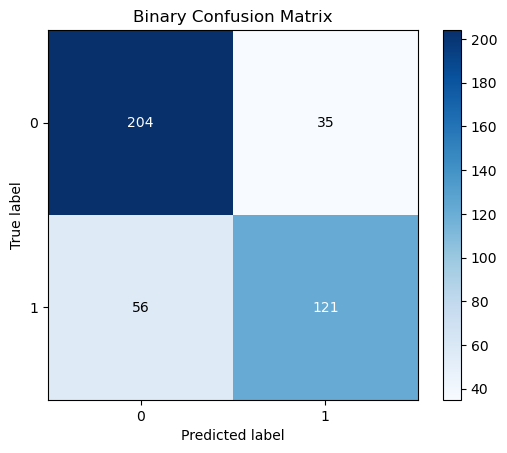

In [5]:
optimal_features = evaluate_model('svm', 'tfidf',df_bin, df_test, C=1,k=3500)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users

Cross-validated F1 score: 0.7560196100343906
Cross-validated Accuracy: 0.7693844597393493
Test Accuracy: 0.7716346153846154
Test F1 score: 0.7590699319031158


C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


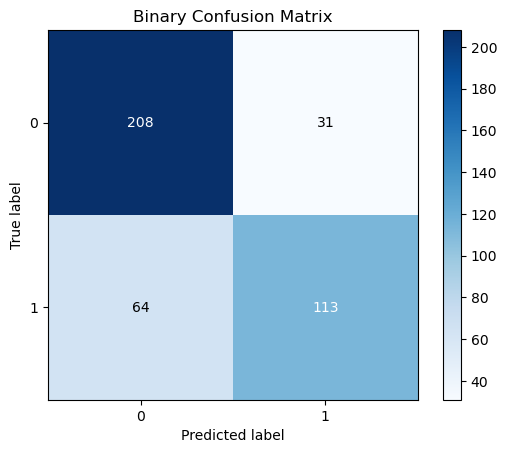

In [6]:
optimal_features = evaluate_model('svm', 'tfidf',df_bin, df_test, C=0.1,k=3400)